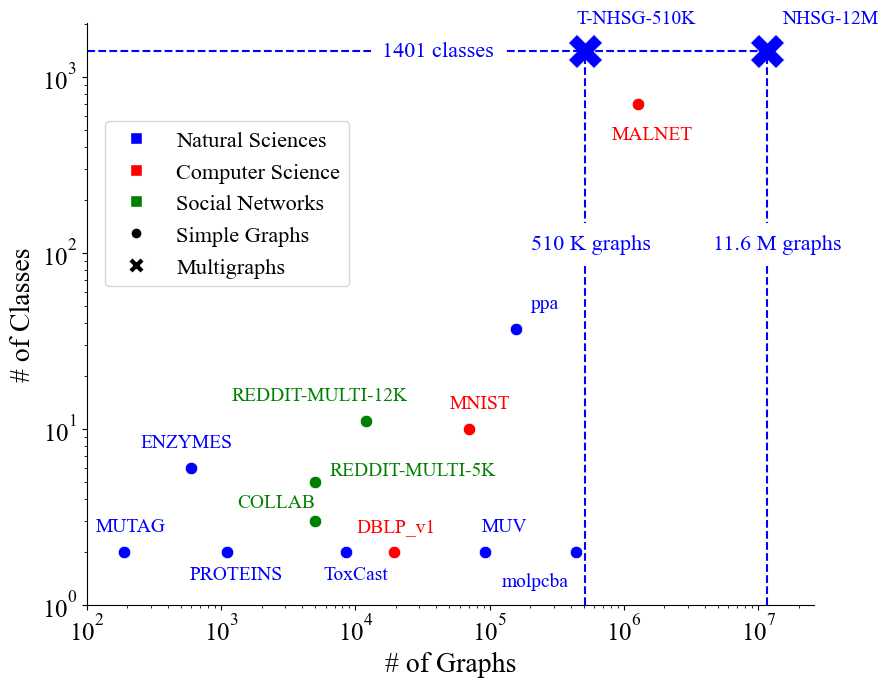

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'Times']  # list of preferred fonts
mpl.rcParams['text.usetex'] = False  # set to True if you want to use LaTeX for all text


# Increase font sizes for axes labels, tick labels, and legend fonts
mpl.rcParams['axes.labelsize'] = 20   # x and y axis label fonts
mpl.rcParams['xtick.labelsize'] = 18     # x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 18     # y-axis tick labels
mpl.rcParams['legend.fontsize'] = 16     # Legend font size

# Define each dataset as a tuple:
# (Dataset Name, # of Graphs, Target Classes, Application Category)
datasets = [
    ("MUTAG", 188, 2, "Natural Sciences"),
    ("ENZYMES", 600, 6, "Natural Sciences"), 
    ("PROTEINS", 1113, 2, "Natural Sciences"),   
    ("REDDIT-MULTI-5K", 4999, 5, "Social Networks"),
    ("COLLAB", 5000, 3, "Social Networks"), 
    ("ToxCast", 8576, 2, "Natural Sciences"),
    ("DBLP_v1", 19456, 2, "Computer Science"),
    ("REDDIT-MULTI-12K", 11929, 11, "Social Networks"),
    ("MUV", 93087, 2, "Natural Sciences"), 
    ("MNIST", 70000, 10, "Computer Science"), 
    ("ppa", 158100, 37, "Natural Sciences"),
    ("molpcba", 437929, 2, "Natural Sciences"),
    ("MALNET", 1262024, 696, "Computer Science"),
    ("NHSG-12M", 11.6*1e6, 1401,"Natural Sciences"),
   ("T-NHSG-510K",  510e3, 1401, "Natural Sciences")

]

# Define a color mapping for the application categories
color_map = {
    "Natural Sciences": "blue",
    "Computer Science": "red",
    "Social Networks": "green"
}

# Create the plot
fig, ax = plt.subplots(figsize=(9, 7))

# Use a logarithmic scale for the x-axis (for # of Graphs)
ax.set_xscale('log')
ax.set_yscale('log')

# Dictionary to store manual offsets for each dataset label
# Format: "Dataset Name": (x_offset, y_offset)
manual_offsets = {
    "MUTAG": (30, 15),
    "ENZYMES": (30, 15),
    "PROTEINS":(40, -20),
    "REDDIT-MULTI-5K": (130,5),
    "COLLAB": (0, 10),
    "ToxCast": (30, -20),
    "DBLP_v1":(30, 15),
    "REDDIT-MULTI-12K": (30, 15),
    "MUV": (30, 15),
    "MNIST":(30, 15), 
    "ppa": (30, 15),
    "molpcba": (-5, -25),
    "MALNET": (40, -25),
    "NHSG-12M": (80, 20),
    "T-NHSG-510K": (80, 20),

}

special = {"NHSG-12M", "T-NHSG-510K"}

special = {"NHSG-12M", "T-NHSG-510K"}

for name, graphs, targets, app in datasets:
    color = color_map.get(app, "black")
    size  = 600 if name in special else 80
    marker = 'X' if name in special else 'o'   # ♦ vs ●

    ax.scatter(graphs, targets,
               color=color,
               s=size,
               marker=marker,       # ← here
               edgecolors='w',      # optional: white border for visibility
               linewidths=0.5)

    offset = manual_offsets.get(name, (-5, 5))
    ax.annotate(name, (graphs, targets),
                textcoords="offset points",
                xytext=offset,
                ha='right', fontsize=14, color=color)



# Set labels and title
ax.set_xlabel("# of Graphs")
ax.set_ylabel("# of Classes") 
# Create a legend for the categories using custom handles
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=cat,
               markerfacecolor=color_map[cat], markersize=8)
    for cat in color_map
]
ax.legend(handles=legend_handles)

# ----------------------- Dashed Lines for SMG-LSC -----------------------
# We'll draw a dashed horizontal line at y = 400 and a dashed vertical line at x = 3e6
# from axis minimum (1 on log scale) to the SMG-LSC coordinate.

# Highlight at (11.6 M, 1401)
NHSG_x = 11.6e6
NHSG_y = 1401
line_color = "blue"



# Horizontal at y=1401 from x=1 → x=11.6e6
ax.plot([1, NHSG_x], [NHSG_y, NHSG_y],
        linestyle="--", color=line_color, zorder=1)
# Vertical at x=11.6e6 from y=1 → y=1401
ax.plot([NHSG_x, NHSG_x], [1, NHSG_y],
        linestyle="--", color=line_color, zorder=1)

# Midpoints (geometric mean) for placing labels
x_mid = 10 ** ((np.log10(1) + np.log10(NHSG_x)) / 2.0)
y_mid = 10 ** ((np.log10(1) + np.log10(NHSG_y)) / 2.0)

# Label the lines
txt_h = ax.text(x_mid*12, NHSG_y*0.88, "1401 classes",
                color=line_color, fontsize=16,
                ha="center", va="bottom", zorder=5)
txt_h.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.5'))

txt_v = ax.text(NHSG_x*0.4, y_mid*3, "11.6 M graphs",
                color=line_color, fontsize=16,
                ha="left", va="center", zorder=5)
 
txt_v.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.5'))


# After your NHSG-12M dashed lines+labels, add:

# 1. Define the T-NHSG-510K coords (same class count)
TNHSG_x, TNHSG_y = 510e3, NHSG_y   # 1401 classes

# 2. Draw its vertical dashed line
ax.plot([TNHSG_x, TNHSG_x], [1, TNHSG_y],
        linestyle="--", color=line_color, zorder=1)

# 3. Compute the log‐midpoint for the y‐axis (for placing text)
y_mid_510 = 10 ** ((np.log10(1) + np.log10(TNHSG_y)) / 2.0)

# 4. Place the "510 K graphs" label
#    Tweak the 0.4 factor to shift left/right
txt_510 = ax.text(TNHSG_x * 0.4, y_mid_510*3, "510 K graphs",
                  color=line_color, fontsize=16,
                  ha="left", va="center", zorder=5)
txt_510.set_bbox(dict(facecolor='white',
                      edgecolor='none',
                      boxstyle='square,pad=0.5'))

# --------------------------- Legend -------------------------------------
from matplotlib.lines import Line2D

# 1. Category‐color handles (as before)
category_handles = [
    Line2D([0], [0],
           marker='s',
           color='w',
           label=cat,
           markerfacecolor=color_map[cat],
           markersize=8)
    for cat in color_map
]

# 2. Shape‐type handles
shape_handles = [
    Line2D([0], [0],
           marker='o',
           color='w',
           label='Simple Graphs',
           markerfacecolor='black',
           markersize=8),
    Line2D([0], [0],
           marker='X',
           color='w',
           label='Multigraphs',
           markerfacecolor='black',
           markersize=12)
]

# 3. Combine and draw one legend
all_handles = category_handles + shape_handles
ax.legend(handles=all_handles,
          loc='upper left',
          bbox_to_anchor=(0.01, 0.85),    
          ncol=1)


# Remove top and right spines to leave only x and y axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim(left=1e2)
ax.set_ylim(bottom=1)
plt.tight_layout()
plt.savefig("DatasetComparison_NgraphVsClasses.pdf")
plt.show()


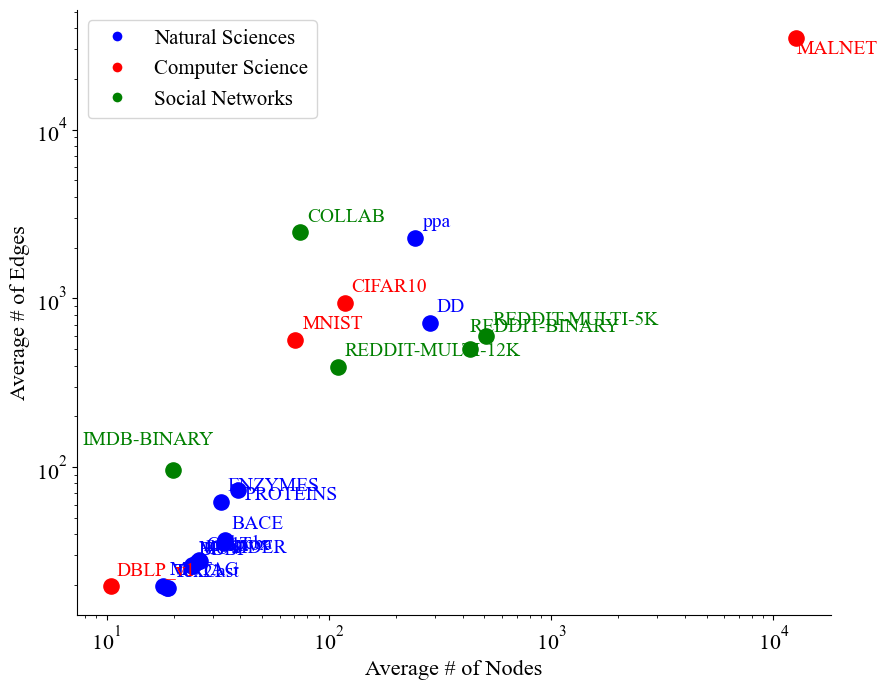

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# ------------------ Matplotlib/Font Configuration ------------------
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'Times']
mpl.rcParams['text.usetex'] = False

# Increase font sizes
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 15

# --------------------------------------------------------------------
# We create a new list for the (Dataset, AvgNodes, AvgEdges, Category).
# The Category is assigned the same as your previous code.
#
# The data are taken from the new columns in your LaTeX table:
# "Avg #Nodes" and "Avg #Edges"
#
# Any dataset with "-" for node/edge is omitted (e.g., SMG-LSC).
# --------------------------------------------------------------------

datasets_nodes_edges = [
    ("MUTAG",           17.9,    19.8,   "Natural Sciences"),
    ("ENZYMES",         32.6,    62.1,   "Natural Sciences"),
    ("IMDB-BINARY",     19.8,    96.5,   "Social Networks"),  # or Natural Sciences if you prefer
    ("PROTEINS",        39.1,    72.8,   "Natural Sciences"),
    ("DD",             284.3,   715.7,   "Natural Sciences"), # originally "D&D"
    ("SIDER",          33.6,    35.4,    "Natural Sciences"),
    ("ClinTox",        26.2,    27.9,    "Natural Sciences"), 
    ("BACE",           34.1,    36.9,    "Natural Sciences"),
    ("REDDIT-BINARY", 429.6,   497.8,    "Social Networks"),
    ("BBBP",           24.1,    26.0,    "Natural Sciences"),
    ("REDDIT-MULTI-5K", 508.5,  594.9,    "Social Networks"),
    ("COLLAB",         74.5,   2457.8,   "Social Networks"),
    ("Tox21",          18.6,    19.3,    "Natural Sciences"),
    ("ToxCast",        18.8,    19.3,    "Natural Sciences"),
    ("DBLP_v1",        10.5,    19.7,    "Computer Science"),
    ("molhiv",         25.5,    27.5,    "Natural Sciences"),
    ("REDDIT-MULTI-12K",110.0, 391.4,    "Social Networks"),
    ("MUV",            24.2,    26.3,    "Natural Sciences"),
    ("CIFAR10",       117.63,  941.1,    "Computer Science"),
    ("MNIST",          70.57,  564.53,   "Computer Science"),
    ("ppa",           243.4,  2266.1,    "Natural Sciences"),
    ("molpcba",        26.0,    28.1,    "Natural Sciences"),
    ("MALNET",      12678.0, 35167.0,    "Computer Science"),
    # SMG-LSC is omitted because its AvgNodes/AvgEdges are "-" in the table
]

# ------------------ Color Mapping (same as your code) ------------------
color_map = {
    "Natural Sciences": "blue",
    "Computer Science": "red",
    "Social Networks": "green"
}

# ------------------ Manual Offsets for Label Placement ------------------
# Adjust these if labels overlap or to place them more nicely
manual_offsets = {
    "MUTAG":         (5, 5),
    "ENZYMES":       (5, 5),
    "IMDB-BINARY":   (-65, 15),
    "PROTEINS":      (5, -10),
    "DD":            (5, 5),
    "SIDER":         (5, -10),
    "ClinTox":       (5, 5), 
    "BACE":          (5, 5),
    "REDDIT-BINARY": (0, 10),
    "BBBP":          (5, 5),
    "REDDIT-MULTI-5K":   (5, 5),
    "COLLAB":        (5, 5),
    "Tox21":         (5, 5),
    "ToxCast":       (5, 5),
    "DBLP_v1":       (4, 5),
    "molhiv":        (5, 5),
    "REDDIT-MULTI-12K": (5, 5),
    "MUV":           (5, 5),
    "CIFAR10":       (5, 5),
    "MNIST":         (5, 5),
    "ppa":           (5, 5),
    "molpcba":       (5, 5),
    "MALNET":        (0, -15),
}

# ------------------ Plot Setup ------------------
fig, ax = plt.subplots(figsize=(9, 7))

# Use log scale for x and y to accommodate large ranges
ax.set_xscale('log')
ax.set_yscale('log')

# Plot each dataset
for name, avg_nodes, avg_edges, category in datasets_nodes_edges:
    color = color_map.get(category, "black")
    
    # Scatter point
    ax.scatter(avg_nodes, avg_edges, color=color, s=120)
    
    # Annotate label
    offset = manual_offsets.get(name, (5, 5))
    ax.annotate(
        name, (avg_nodes, avg_edges),
        textcoords="offset points",
        xytext=offset,
        ha='left',
        va='bottom',
        fontsize=14,
        color=color
    )

# Axis labels
ax.set_xlabel("Average # of Nodes")
ax.set_ylabel("Average # of Edges")

# Build a legend from your categories
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=cat,
               markerfacecolor=color_map[cat], markersize=8)
    for cat in color_map
]
ax.legend(handles=legend_handles, loc="best")

# Remove top/right spines (cleaner look)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

# If you like, save the figure:
# plt.savefig("DatasetComparison_AvgNodesVsAvgEdges.pdf")

plt.show()
